<a href="https://colab.research.google.com/github/XingruiWang/RUC-Deep-Learning-Course/blob/master/Homework/HW_4/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Comparation Between Different Optimazors

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/RUC/DeepLearning/course7
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/RUC/DeepLearning/course7
data_facescore	data_foodscore	FoodScore.csv  程序


### 1. Loading required packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Model, Input
from keras.layers import Dense,Flatten,Input
from keras.optimizers import SGD,RMSprop,Adam

from keras.utils import to_categorical 

In [11]:
## loading mnist dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

## One-hot encode y label
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

print(Y_train.shape) # 60000 * 10. 60000 means the amount of data, 10 means 10 classes of number in dataset.
print(Y_train[0]) # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] means number 5

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Model in Keras

Model structure: a two-layer neural network

In [12]:
def NNModel(IMSIZE = 28, p = 1000, q = 10):  
    '''
    Description: Define the model
    ----------------------
    Args:
        IMSIZE: the size of input image, the width and height are same here.
        p: the number of neurons in first hidden layer, defult value is 1000
        q: the number of neurons in output layer，defult value is 10 since there are 10 classes.
    ----------------------
    return:
        model: the keras model
    ----------------------
    Usages:
    >>> model = NNModel(28, 1000, 10)

    '''                                            
    input_layer = Input([IMSIZE,IMSIZE])         # the size of a MNIST image is 28 * 28 * 1
    x = input_layer                              
    x = Flatten()(input_layer)                   # flatten the Tensor (28*28*1) to a vetor (784 * 1)
    x = Dense(1000,activation = 'relu')(x)       # hidden layer: fully connection (1000 neurons) + relu
    x = Dense(10,activation = 'softmax')(x)      # output layer，fully connection (10 neurons) + softmax, output value range from 0 to 1
    output_layer = x
    model=Model(input_layer,output_layer)        # connect the input layer, hidden layer and output layer.
    model.summary()
    return model

In [13]:
def Momentum(lr, momentum = 0.5):
    '''
    Momentum optimizer, defined by keras.optimizers.SGD() function with the parameter `momentum > 0`
    '''
    return SGD(lr = lr, momentum = momentum)


In [18]:
def train(model, X_train, X_test, y_train, y_test,
            batch_size = 128, epochs = 50,
            opt = SGD, lr = 0.001, 
            loss_type = "categorical_crossentropy",
            metrics = ['accuracy']):
    '''
    Desctiption: Training function. Compile the model with different optimizers
    ------------------------------------------------
    Parameter:
        model: keras Model
        X_train, X_test, y_train, y_test: <numpy.array> training set and validation set, 
        batch_size: <int> batch size, defualt value is 128
        epochs: <int> maximum epochs of training, defualt value is 50
        opt: optimizer function, e.g. keras.optimizers.SGD
        lr: learning rate, default value is 0.001
        loss_type: <string> the name of loss function, for the classification task here, default value is 'categorical_crossentropy'
        metrics: <string> the name of matric, for the classification task here, default value is 'accuracy'
    -------------------------------------------------
    return:
        model: the keras model
        train_loss: <list>
        val_loss: <list>
        train_auc: <list>
        val_auc: <list>
    '''

    model.compile(loss = loss_type, optimizer = opt(lr = lr), metrics = metrics)
    history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = batch_size, epochs = epochs, verbose = 2)
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    train_auc = history.history["accuracy"]
    val_auc = history.history["val_accuracy"]
    
    return model, train_loss, val_loss, train_auc, val_auc

In [15]:
def render_loss(losses, name):
    t = np.arange(len(losses[0]))
    for i, loss in enumerate(losses):
        print(i, loss)
        plt.plot(t, loss, label = name[i])
    plt.xlabel('Epochs')
    plt.ylabel('loss') 
    plt.show()

In [19]:
optimizors = ["SGD", "Momentum", "RMSprop", "Adam"]
losses = [None] * 4

for i, opt in enumerate(optimizors):
    print("=====================================\nTraining %s \n"%(opt))
    model = NNModel()
    model, loss = train(model,  X_train, X_test, Y_train, Y_test, opt = eval(optimizors[i]))
    losses[i] = loss

Training SGD 
Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
469/469 - 1s - loss: 5.6147 - accuracy: 0.8972 - val_loss: 1.0238 - val_accuracy: 0.9305
Epoch 2/50
469/469 - 1s - loss: 0.5155 - accuracy: 0.9537 - val_loss: 0.7417 - val_accuracy: 0.9430
Epoch 3/50
469/469 - 1s - loss:

0 [5.6147003173828125, 0.515451967716217, 0.2594027817249298, 0.13841107487678528, 0.07777862250804901, 0.04330785572528839, 0.02310206927359104, 0.012133508920669556, 0.006132724229246378, 0.003540530800819397, 0.002075823489576578, 0.001222580554895103, 0.000906040077097714, 0.0007765725022181869, 0.0006974345305934548, 0.000630939204711467, 0.0005842123064212501, 0.0005418896907940507, 0.0005084273288957775, 0.00048015432548709214, 0.0004541229864116758, 0.0004309403302613646, 0.00041068284190259874, 0.0003943846095353365, 0.0003778950194828212, 0.0003642712254077196, 0.00035007038968615234, 0.0003386532480362803, 0.00032625708263367414, 0.00031725186272524297, 0.00030567459180019796, 0.0002983728190883994, 0.000288819195702672, 0.00028173456666991115, 0.00027368534938432276, 0.0002666435029823333, 0.00026009028078988194, 0.0002534922678023577, 0.00024755578488111496, 0.00024227668473031372, 0.00023715666611678898, 0.00023174074885901064, 0.00022689611068926752, 0.000222382615902461

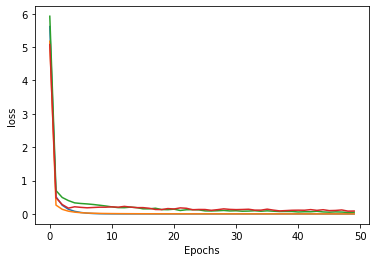

In [20]:
render_loss(losses, optimizors)